# PCA

In [25]:
#Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
#Loading my dataset
data = pd.read_csv('game_details_with_counts.csv')  

#Selecting quantitative columns for PCA
quant_data = data[['min_players', 'max_players', 
                    'min_playtime', 'max_playtime', 'min_age', 
                    'users_rated', 'average_rating',
                    'category_count', 'mechanic_count']]  

#Standardizing the data using StandardScaler
scaler = StandardScaler()
quant_data_scaled = scaler.fit_transform(quant_data)

#Performing PCA with n_components=2
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(quant_data_scaled)

#Performing PCA with n_components=3
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(quant_data_scaled)

In [27]:
pca_2d_result

array([[ 1.57111364, -5.25122304],
       [ 0.02825279, -5.93876084],
       [ 0.5181667 , -6.10724094],
       ...,
       [-1.17927969, -0.5380738 ],
       [-1.01754191,  0.60952925],
       [-1.91399894,  0.65662465]])

In [28]:
pca_3d_result

array([[ 1.57111364, -5.25122304,  6.83553722],
       [ 0.02825279, -5.93876084,  5.98533173],
       [ 0.5181667 , -6.10724094,  5.69655629],
       ...,
       [-1.17927969, -0.5380738 , -0.9751606 ],
       [-1.01754191,  0.60952925, -0.40282909],
       [-1.91399894,  0.65662465, -0.32973463]])

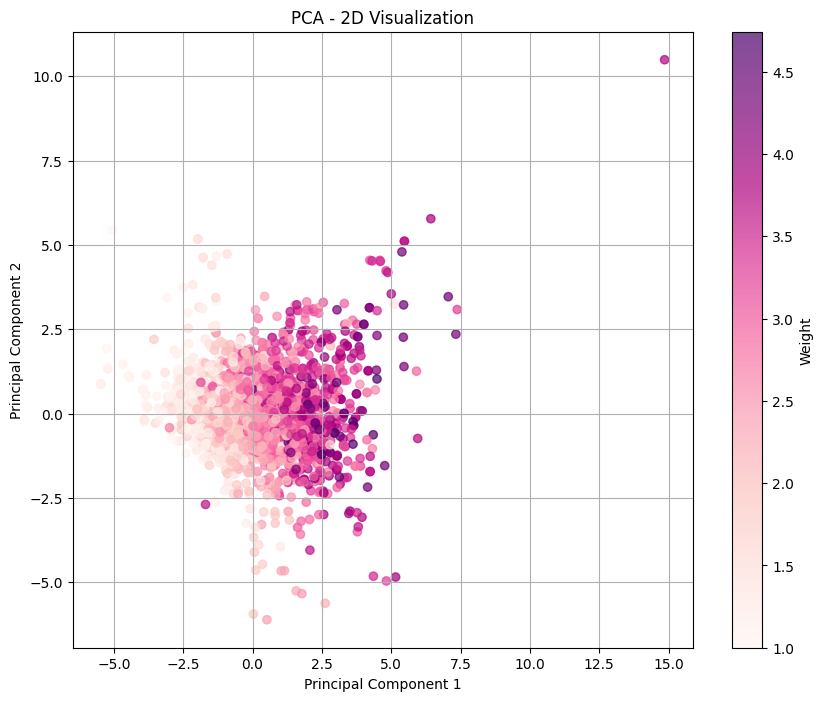

In [29]:
#Visualizing the 2D data with color mapping to weight
plt.figure(figsize=(10, 8))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], c=data['weight'], alpha=0.7, cmap='RdPu')
plt.colorbar(label='Weight')  # Add color bar
plt.title('PCA - 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('PCA_2D.png')
plt.show()

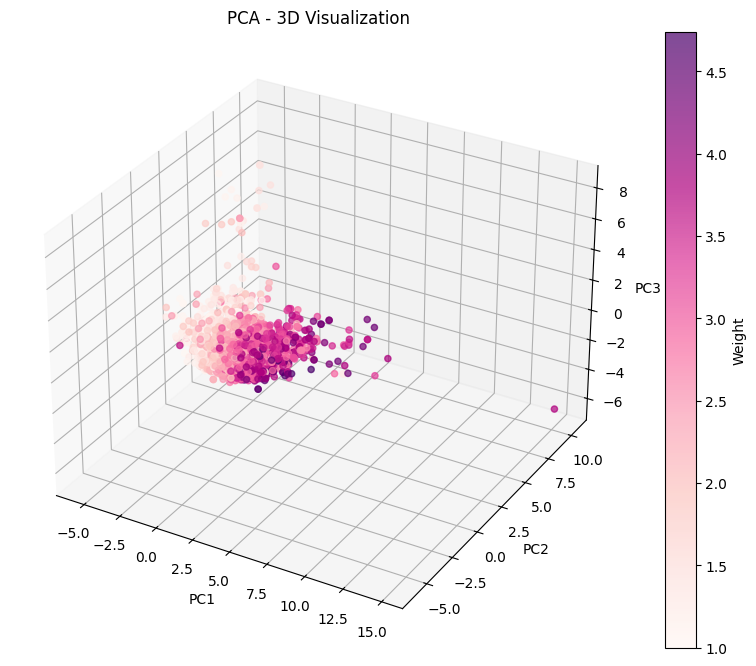

In [30]:
#Visualizing the 3D data with color mapping to weight
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2], 
                     c=data['weight'], alpha=0.7, cmap='RdPu')
plt.colorbar(scatter, label='Weight')  # Add color bar
ax.set_title('PCA - 3D Visualization')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.savefig('PCA_3D.png')
plt.show()

In [31]:
#Calculating the percentage of variance explained by 2D components
explained_variance_2d = pca_2d.explained_variance_ratio_
cumulative_variance_2d = explained_variance_2d.sum()

print(f"Cumulative variance explained by 2 components: {cumulative_variance_2d * 100:.2f}%")

Cumulative variance explained by 2 components: 42.76%


In [32]:
#Calculating the percentage of variance explained by 3D components
explained_variance_3d = pca_3d.explained_variance_ratio_
cumulative_variance_3d = explained_variance_3d.sum()

print(f"Cumulative variance explained by 3 components: {cumulative_variance_3d * 100:.2f}%")

Cumulative variance explained by 3 components: 55.68%


In [33]:
#Determining how many components are needed to retain at least 95% of the data
pca_full = PCA(n_components=0.95)
pca_full.fit(quant_data_scaled)
n_components_for_95_variance = pca_full.n_components_

print(f"Number of components needed to retain at least 95% variance: {n_components_for_95_variance}")

Number of components needed to retain at least 95% variance: 8


In [34]:
#Getting the top 3 eigenvalues
eigenvalues = pca_full.explained_variance_

print(f"Top 3 eigenvalues: {eigenvalues[:3]}")



Top 3 eigenvalues: [2.57708675 1.27217246 1.16362529]
